<a href="https://colab.research.google.com/github/Shubham080997/Taxi_Surge_Pricing/blob/main/Taxi_surge_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT ON TAXI MOBILITY SURGE PRICE PREDICTION**

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers. The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.


● Trip_ID: ID for TRIP

● Trip_Distance: The distance for the trip requested by the customer

● TypeofCab: Category of the cab requested by the customer

● CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month

● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

● Customer_Rating: Average of lifetime ratings of the customer till date

● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for

modelling purposes

● Gender: Gender of the customer

● SurgePricingType: Target (can be of 3 types) - DV

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
taxi_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 5/Week 1/Day 1/data_sigma_cabs.csv')

In [ ]:
taxi_df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
taxi_df.duplicated().sum()

0

In [ ]:
# Getting the info of null values
taxi_df.dropna().isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Trip_Distance                41608 non-null  bool 
 1   Type_of_Cab                  41608 non-null  bool 
 2   Customer_Since_Months        41608 non-null  bool 
 3   Life_Style_Index             41608 non-null  bool 
 4   Confidence_Life_Style_Index  41608 non-null  bool 
 5   Destination_Type             41608 non-null  bool 
 6   Customer_Rating              41608 non-null  bool 
 7   Cancellation_Last_1Month     41608 non-null  bool 
 8   Var1                         41608 non-null  bool 
 9   Var2                         41608 non-null  bool 
 10  Var3                         41608 non-null  bool 
 11  Gender                       41608 non-null  bool 
 12  Surge_Pricing_Type           41608 non-null  bool 
dtypes: bool(13)
memory usage: 853.3 KB


In [ ]:
# Checking of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculating the VIF factor
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Getting the VIF factor for the variable
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['Surge_Pricing_Type']]].dropna())

,variables,VIF
0,Trip_Distance,4.873858
1,Customer_Since_Months,4.024759
2,Life_Style_Index,145.365898
3,Customer_Rating,12.332220
4,Cancellation_Last_1Month,1.648301
5,Var1,9.124250
6,Var2,156.300582
7,Var3,89.595027


In [ ]:
# Dropping the Trip_Id column as it is not of much importance
taxi_df.drop(columns=['Trip_ID'],inplace=True)

In [ ]:
taxi_df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

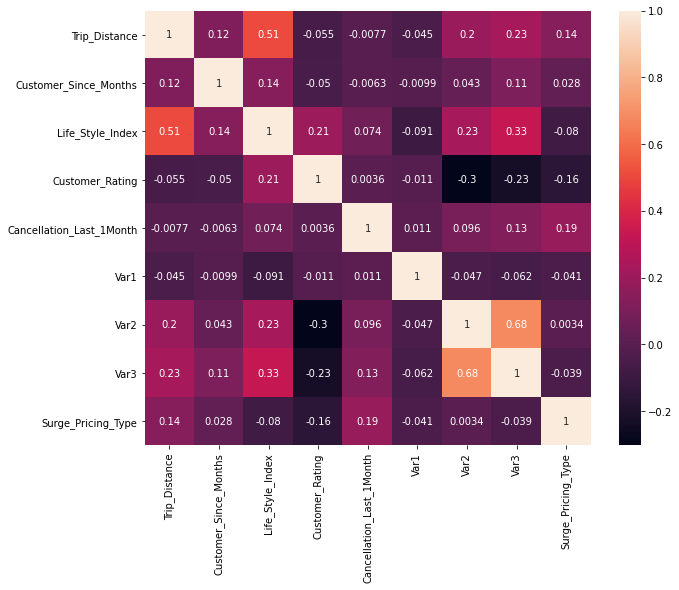

In [ ]:
# Getting the correlation details
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(taxi_df.corr(),annot=True)